Bank Customer Churn

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# Mengetahui Kolom Categoric
categorical = ['Surname','Geography','Gender']

In [11]:
for col in categorical:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of Surname column
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64 

Value counts of Geography column
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64 

Value counts of Gender column
Male      5457
Female    4543
Name: Gender, dtype: int64 



In [13]:
df.shape

(10000, 14)

In [20]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_code
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


## Encoding Feature

In [18]:
# Encode Gender Feature
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Gender'])
df['Gender_code'] = le.transform(df['Gender'])

In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_code
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [22]:
# One Hot Encoding Feature "Geography"
dummies_Geography = pd.get_dummies(df['Geography'],prefix='geography')
dummies_Geography.head()

,geography_France,geography_Germany,geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [24]:
# Penggabungan column one hot encoding Geography
df = pd.concat([df, dummies_Geography], axis=1)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Exited,Gender_code,geography_France,geography_Germany,geography_Spain,geography_France,geography_Germany,geography_Spain
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,101348.88,1,0,1,0,0,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,1,112542.58,0,0,0,0,1,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,0,113931.57,1,0,1,0,0,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,93826.63,0,0,1,0,0,1,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,1,79084.10,0,0,0,0,1,0,0,1


In [27]:
# drop dan choose feature yang dibutuhkan untuk analisis
data = df.drop(['RowNumber','CustomerId','Surname','Geography','Gender'], axis=1)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_code,geography_France,geography_Germany,geography_Spain,geography_France,geography_Germany,geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1,0,0,1


## Random Forest

In [28]:
# the usual splitting 
from sklearn.model_selection import train_test_split

X = data.drop(columns='Exited').to_numpy()
y = data[['Exited']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [29]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [30]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 13.1 s, sys: 3.85 ms, total: 13.1 s
Wall time: 13.1 s


It takes 13 seconds to finish

In [31]:
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
23,"{'max_depth': 5, 'n_estimators': 40}",0.257240,1
22,"{'max_depth': 5, 'n_estimators': 30}",0.256625,2
24,"{'max_depth': 5, 'n_estimators': 50}",0.249248,3
21,"{'max_depth': 5, 'n_estimators': 20}",0.237588,4
20,"{'max_depth': 5, 'n_estimators': 10}",0.230207,5
19,"{'max_depth': 4, 'n_estimators': 50}",0.199522,6
17,"{'max_depth': 4, 'n_estimators': 30}",0.198911,7
18,"{'max_depth': 4, 'n_estimators': 40}",0.198905,8
15,"{'max_depth': 4, 'n_estimators': 10}",0.165769,9
16,"{'max_depth': 4, 'n_estimators': 20}",0.155315,10


If we want to speed up the training process, we may use RandomizedSearchCV

In [33]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 6.6 s, sys: 0 ns, total: 6.6 s
Wall time: 7.15 s


In [35]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'n_estimators': 40, 'max_depth': 5}",0.257240,1
3,"{'n_estimators': 50, 'max_depth': 5}",0.249248,2
1,"{'n_estimators': 30, 'max_depth': 4}",0.198911,3
4,"{'n_estimators': 20, 'max_depth': 4}",0.155315,4
5,"{'n_estimators': 40, 'max_depth': 3}",0.102520,5
8,"{'n_estimators': 50, 'max_depth': 3}",0.100068,6
9,"{'n_estimators': 20, 'max_depth': 3}",0.081654,7
6,"{'n_estimators': 40, 'max_depth': 2}",0.061387,8
2,"{'n_estimators': 30, 'max_depth': 2}",0.057095,9
7,"{'n_estimators': 10, 'max_depth': 2}",0.000000,10


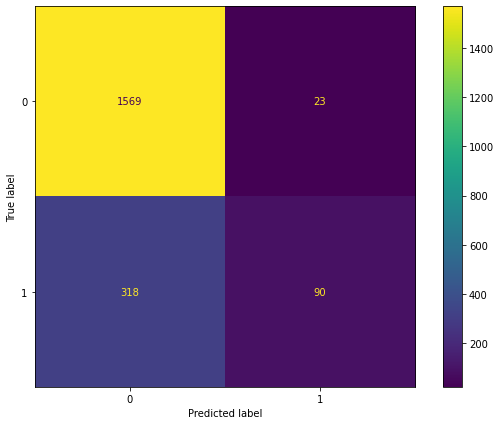

In [36]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [37]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1592
           1       0.80      0.22      0.35       408

    accuracy                           0.83      2000
   macro avg       0.81      0.60      0.62      2000
weighted avg       0.82      0.83      0.79      2000

